# Stock Market Analysis  during the COVID-19 Crisis

![title](960x0.jpg)

In this project i am going to analyze stock data related to a few company operating in different industries, from march 2020 to december  1 2020. 
We will try to see how the crisis affected those companies 

 
 
RESSOURCES : 
Python for financial analysis : 
https://www.udemy.com/course/python-for-finance-and-trading-algorithms/#instructor-1

# Part 0 : Import 


In [80]:
import datetime 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_datareader  
import pandas_datareader.data as reader 
from pandas_datareader import data as web

#  IMPORTING  DATA 

In [89]:
#start and end date of the analysis 
date_start = datetime.datetime(2020, 3, 1)
date_end = datetime.datetime(2020, 12, 1)

#Defining stocks to download (MODERNA,NETFLIX,Christian Dior, Airbus,Spotify )
stocks = ['MRNA','NFLX','CDI.PA','AIR.PA','SPOT']

In [78]:
#Downloading the stocks
df_stocks = reader.get_data_yahoo(stocks,date_start,date_end)
df_stocks.head()

Attributes  Adj Close                                                  \
Symbols          MRNA        NFLX      CDI.PA      AIR.PA        SPOT   
Date                                                                    
2020-03-02  29.879999  381.049988  377.484741  104.209511  139.339996   
2020-03-03  27.910000  368.769989  373.776245  108.566910  137.160004   
2020-03-04  27.490000  383.790009  380.412476  107.443665  144.250000   
2020-03-05  28.010000  372.779999  367.725555  104.306343  148.080002   
2020-03-06  29.610001  368.970001  355.429016   96.346832  145.139999   

Attributes      Close                                                  ...  \
Symbols          MRNA        NFLX      CDI.PA      AIR.PA        SPOT  ...   
Date                                                                   ...   
2020-03-02  29.879999  381.049988  386.799988  107.620003  139.339996  ...   
2020-03-03  27.910000  368.769989  383.000000  112.120003  137.160004  ...   
2020-03-04  27.490000  383.790009  389.799988  110.959999  144.250000  ...   
2020-03-05  28.010000  372.779999  376.799988  107.720001  148.080002  ...   
2020-03-06  29.610001  368.970001  364.200012   99.500000  145.139999  ...   

Attributes       Open                                                  \
Symbols          MRNA        NFLX      CDI.PA      AIR.PA        SPOT   
Date                                                                    
2020-03-02  27.000000  373.109985  391.000000  110.000000  137.979996   
2020-03-03  27.804001  381.029999  396.399994  109.580002  139.429993   
2020-03-04  27.990000  377.769989  383.000000  112.120003  139.000000   
2020-03-05  27.490000  381.000000  397.000000  110.879997  141.740005   
2020-03-06  27.980000  367.700012  369.000000  103.900002  145.250000   

Attributes      Volume                                            
Symbols           MRNA       NFLX   CDI.PA     AIR.PA       SPOT  
Date                                                              
2020-03-02  33084000.0  6997900.0  36230.0  4352851.0  1001700.0  
2020-03-03  17599100.0  8364600.0  31243.0  4116304.0   964900.0  
2020-03-04  11817700.0  5487300.0  30736.0  2046426.0  1336000.0  
2020-03-05  14670000.0  8747000.0  23969.0  2689493.0  1501600.0  
2020-03-06  21097500.0  8147200.0  38363.0  4273436.0  1311500.0  

[5 rows x 30 columns]

#  EXPLORATORY DATA ANALYSIS OF DIFFERENT STOCKS 
In this part i am going to create different plots with matplotlib to better analyze the trends of the different stocks. 



<AxesSubplot:title={'center':'Open Price from March to December 2020'}, xlabel='Date'>

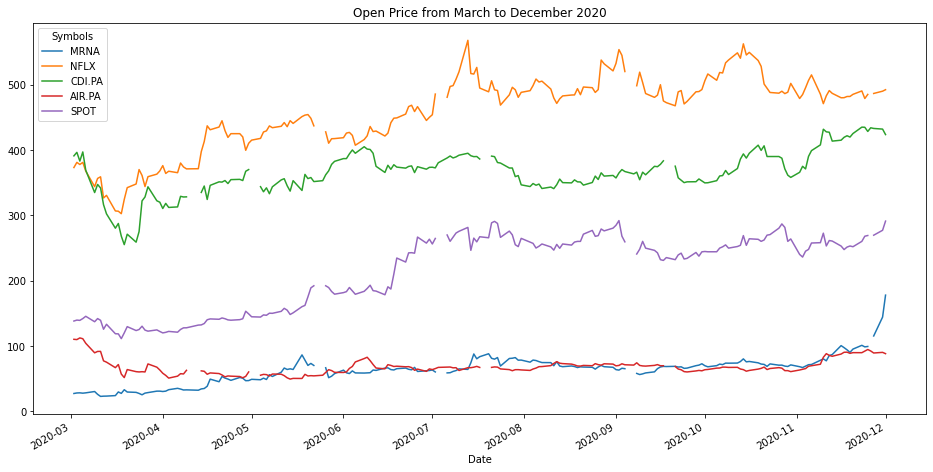

In [70]:
#Getting the open price 
df_stocks['Open'].plot(figsize=(16,8),title='Open Price from March to December 2020')

**Plot of the volume traded each day** :

<AxesSubplot:title={'center':'Volume Traded'}, xlabel='Date'>

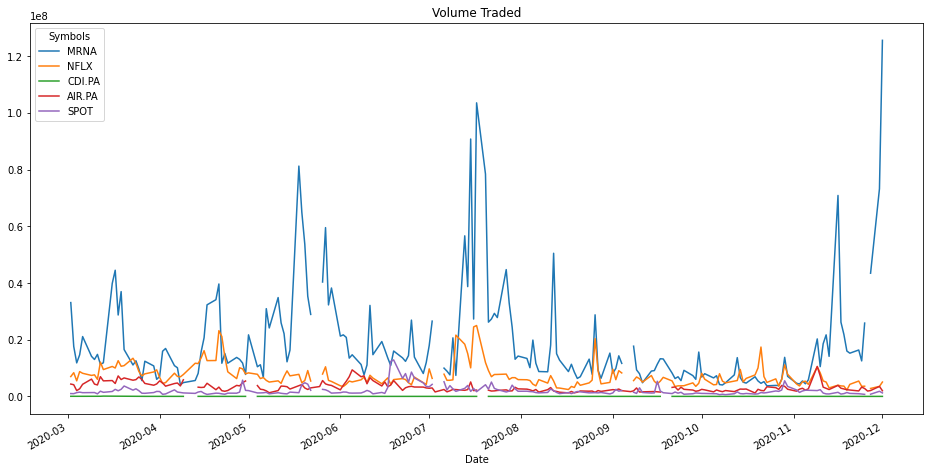

In [28]:
df_stocks['Volume'].plot(figsize=(16,8),title='Volume Traded')

It appears that a huge amount of  money was traded for Moderna in 2020 . Using pandas we can directly know at what time this huge transaction happened : 


In [31]:
df_stocks['Volume'].idxmax()

Symbols
MRNA     2020-12-01
NFLX     2020-07-17
CDI.PA   2020-03-13
AIR.PA   2020-11-09
SPOT     2020-06-19
dtype: datetime64[ns]

So, on 2020-12-01 a huge amount for Moderna was traded. It seems interesting to know why.
 
Basically, 
Moderna’s shares soared after American pharmaceutical company  announced  that new data showed its coronavirus vaccine to be remarkably effective at combating the infection, and that it would seek authorization from the FDA and European regulators to allow emergency use. The company’s CEO told the New York Times that shots could be available to high-risk populations as soon as December 21.

Moderna’s stock rose more than 16% in after-hours trading on the news. 

More info on this link : https://nymag.com/intelligencer/2020/11/moderna-covid-vaccine-shots-could-be-ready-by-december-21.html




----------------------------------------------------------------------------



The companies operate in different industries.The different companies have been affected whether either positively or negatively by the COVID-19 crisis.
Yet, we can still try to see if there is any relationship between these stocks. To do so i will use a scatter matrix . 


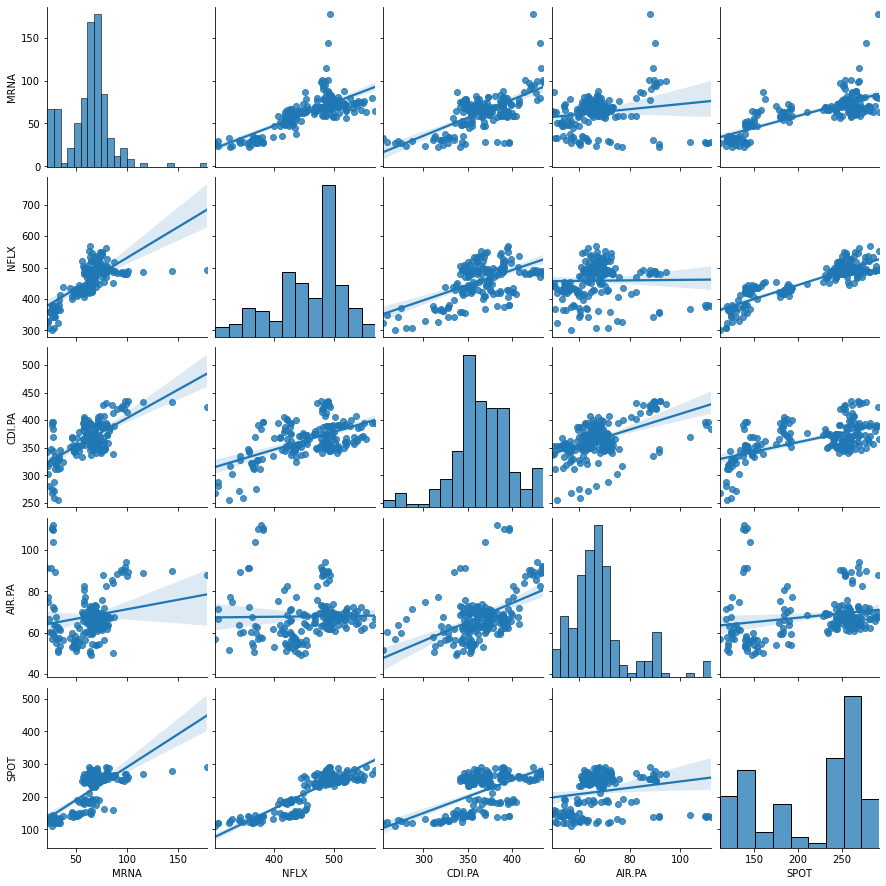

In [65]:
#Plotting correlation between stocks 
sns.pairplot(df_stocks['Open'], kind='reg')

# PART 2: BASIC FINANCIAL ANALYSIS 

# Daily percentage change 

Percentage change is a simple mathematical concept that represents the degree of change over time. It is used for many purposes in finance, often to represent the price change of a security.

We use the following formula to compute it : 
$ r_t =  \frac{p_t}{p_{t-1}} -1 $

$ r_t $ : return at time t 


$ p_t $ : price at time t 


This formula is very helpful to a analyse a volatility of a stock . But obviously , it seems not enough pertinent when predicting the future values. 

Still, with this formula we can know which stock has been the most stable since 2015. 

To do so we can create a new column from all the 3 dataFrame which contains the return of the 3 stocksand then calculate the percent returns and then plot them with a histogram. 


## Stocks RETURNS 

In [49]:
#returns  
returns = df_stocks['Close'].pct_change(1)
returns

Symbols,MRNA,NFLX,CDI.PA,AIR.PA,SPOT
Date,,,,,
2020-03-02,NaN,NaN,NaN,NaN,NaN
2020-03-03,-0.065930,-0.032227,-0.009824,0.041814,-0.015645
2020-03-04,-0.015048,0.040730,0.017755,-0.010346,0.051691
2020-03-05,0.018916,-0.028688,-0.033350,-0.029200,0.026551
2020-03-06,0.057122,-0.010220,-0.033439,-0.076309,-0.019854
...,...,...,...,...,...
2020-11-25,0.107752,0.004390,0.006055,-0.021390,-0.000185
2020-11-26,0.000000,0.000000,0.004630,-0.018579,0.000000
2020-11-27,0.163491,0.013113,-0.005530,0.002227,0.027880


¨Plot of each companies returns : 


<Figure size 432x288 with 0 Axes>

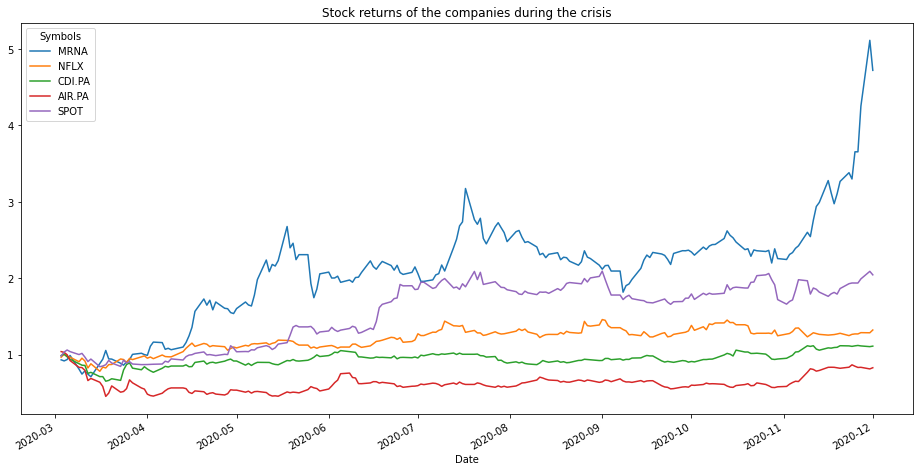

In [41]:
fig = plt.figure()
(returns + 1).cumprod().plot(figsize=(16,8),title='Stock returns of the companies during the crisis')
plt.show()

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

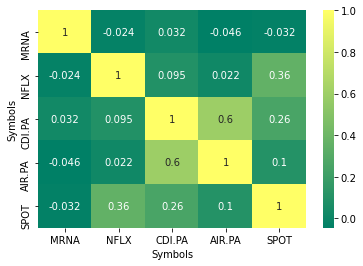

In [46]:
sns.heatmap(returns.corr(), annot=True, cmap='summer')

Again,The correlation matrix allows us to see how all the companies returns are related. 

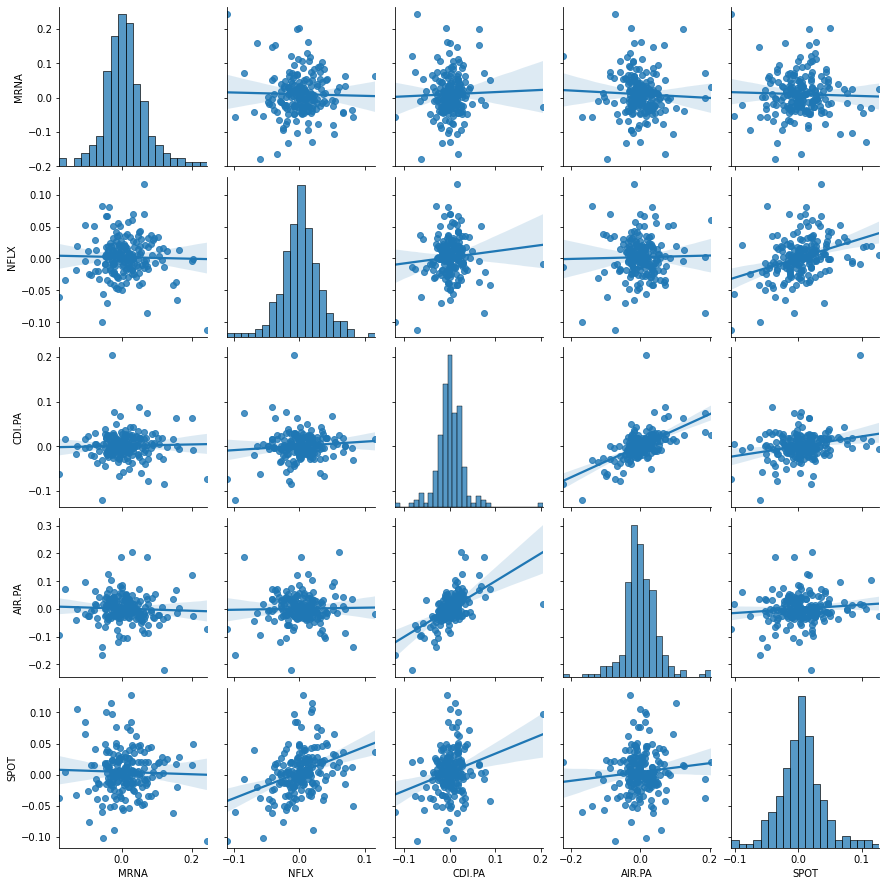

In [47]:
sns.pairplot(returns, kind='reg')

Now let's use the kernel density estimation 

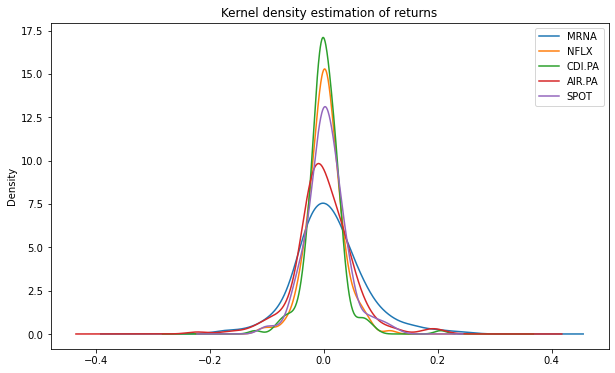

In [60]:
#Plotting kernel density estimation
returns.plot(kind='kde',title='Kernel density estimation of returns',figsize=(10,6))
plt.legend()

We can now see clearly that Christian dior stocks is clearly peaking much more stable than any of the stocks.
In comparison to Moderna for example 

Now let's use box plots to compare the returns 

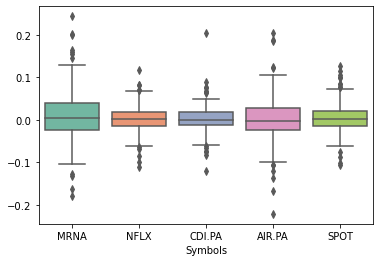

In [61]:
#Plotting returns box plots 
returns_box_plot = sns.boxplot(data=returns, orient="v", palette="Set2")

WIth this method we can see again that Moderna Returns and Airbus seems to be  more volatile 

# CUMULATIVE DAILY RETURNS 

## What Is Cumulative Return?
A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the amount of time involved

More explantion here provided by the online  course of M Pierran on financial analysis and algorithmic trading : 
    https://www.udemy.com/course/python-for-finance-and-trading-algorithms/
        



With daily cumulative returns, the question we are trying to answer is the following, if **I invested $1** in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be



**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made. If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows


The formula for a **cumulative daily return** is:

$i_i = (1+r_t) * i_{t-1}$

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [71]:
cumulative_ret = (returns + 1).cumprod()

Now let's plot all the cumulative return columns against the time series index. To see which stock has made the highest return for a $1 invested 

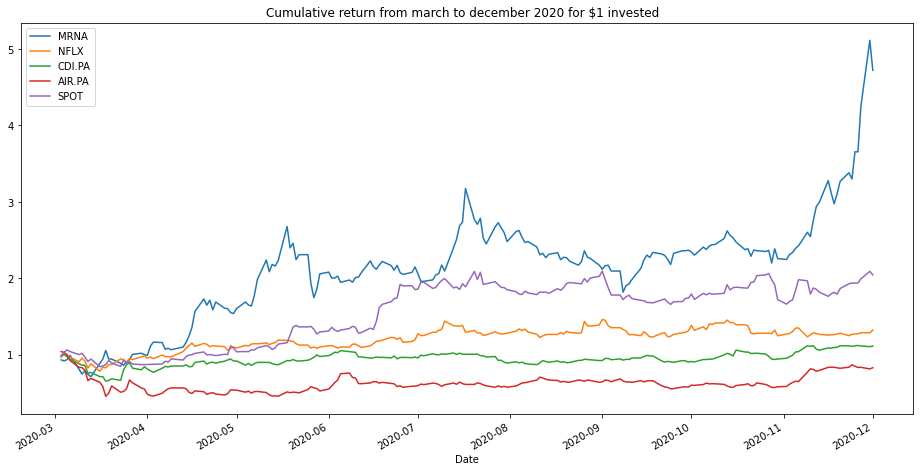

In [88]:
cumulative_ret.plot(figsize=(16,8),title='Cumulative return from march to december 2020 for $1 invested  ')

plt.legend()

As expected Moderna stock made the highest return for a $1 invested 